# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
# Format numbers to have . and , separators
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
# Number of rows and columns
data.shape

(5391, 6)

In [5]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4337,391,2/14/2013,A Good Day to Die Hard,"$92,000,000","$304,249,198","$67,349,198"
3747,3227,10/2/2010,Triangle,"$12,000,000","$1,595,168",$0
3427,1205,7/31/2009,Aliens in the Attic,"$45,000,000","$59,551,283","$25,200,412"
2641,4490,3/31/2006,Marilyn Hotchkiss' Ballroom Dancing and Charm ...,"$2,500,000","$497,195","$349,132"
3625,4281,4/16/2010,El secreto de sus ojos,"$3,500,000","$40,527,719","$6,391,436"


In [6]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [7]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [8]:
print(f'Any NaN values among the data? {data.isna().values.any()}')

Any NaN values among the data? False


In [9]:
print(f'Any duplicates? {data.duplicated().values.any()}')

duplicated_rows = data[data.duplicated()]
print(f'Number of duplicates: {len(duplicated_rows)}')

Any duplicates? False
Number of duplicates: 0


In [10]:
# Show NaN values and data types per column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [11]:
# Removing $ and ,
chars_to_remove = ["$", ","]
columns_to_clean = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]
for col in columns_to_clean:
  for char in chars_to_remove:
    # Replace each chars with empty string
    data[col] = data[col].astype(str).str.replace(char,"")
  # Converting each column in numeric data type
  data[col] = pd.to_numeric(data[col])

data.head()



,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [12]:
# Convert to pd Datatime type
data["Release_Date"] = pd.to_datetime(data.Release_Date)

data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [13]:
# Check now the types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [14]:
# Avg budget
print(data.USD_Production_Budget.mean())



print(data.describe())
# Avg production budget is 31.113.737,58 USD
# Avg worldwide gross revenue of films is 88.855.421,96 USD
# Min domestic revenue is 0 USD and worldwide revenue is 0 USD aswell
# Bottom 25% of films lose money because budget is 5mil USD and gross is on avg 3,865 mil USD
# Highest production budget is 425.000.000,00 USD and highest worldwide gross revenue of film is 2,783,918,982.00	USD
# Revenue of lowest budget film is 181.041,00 USD
print(data[data.USD_Production_Budget == 1100])
# Revenue for highest budget film is 2.783.918.982 USD
print(data[data.USD_Production_Budget == 425000000])

31113737.57837136
          Rank                   Release_Date  USD_Production_Budget  \
count 5,391.00                           5391               5,391.00   
mean  2,696.00  2003-09-19 15:02:02.203672704          31,113,737.58   
min       1.00            1915-08-02 00:00:00               1,100.00   
25%   1,348.50            1999-12-02 12:00:00           5,000,000.00   
50%   2,696.00            2006-06-23 00:00:00          17,000,000.00   
75%   4,043.50            2011-11-23 00:00:00          40,000,000.00   
max   5,391.00            2020-12-31 00:00:00         425,000,000.00   
std   1,556.39                            NaN          40,523,796.88   

       USD_Worldwide_Gross  USD_Domestic_Gross  
count             5,391.00            5,391.00  
mean         88,855,421.96       41,235,519.44  
min                   0.00                0.00  
25%           3,865,206.00        1,330,901.50  
50%          27,450,453.00       17,192,205.00  
75%          96,454,455.00       52,343

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [15]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [16]:
data[data["USD_Domestic_Gross"] == 0].sort_values("USD_Production_Budget", ascending=False).head(10)
# Highest budget film that grossed nothing is Singularity with budget of 175.000.000 USD

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0


In [17]:
# Number of films with gross of 0 USD
len(data[data["USD_Domestic_Gross"] == 0]) # --> 512

512

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [18]:
# Number of films with gross of 0 USD worldwide
len(data[data["USD_Worldwide_Gross"] == 0]) # --> 357

357

### Filtering on Multiple Conditions

In [19]:
# Which films made money internationally (i.e., data.USD_Worldwide_Gross != 0), but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross == 0)?
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                                  (data.USD_Worldwide_Gross != 0)]
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [20]:
inter_rel = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0")
print(f'Number of international releases with $0 gross in USA: {len(inter_rel)}')
inter_rel.head()

Number of international releases with $0 gross in USA: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [21]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [29]:
# Wich films were not released yet
not_released = data[data.Release_Date >= scrape_date]
not_released

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [30]:
# How many films inlcuded are there that are not yet screened in the box office
len(not_released)

7

In [31]:
# DF without these films
data_clean = data.drop(not_released.index)
len(data_clean)

5384

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [36]:
# Films with debt
films_with_debt = data_clean[data_clean["USD_Production_Budget"].values > data_clean["USD_Worldwide_Gross"].values]
print(len(films_with_debt))

# Calculating debt percent
percent = (len(films_with_debt)*100)/len(data_clean)

print(f'{percent:.2f}% of films had a production cost exceeding the worldwide gross revenue')

2007
37.28% of films had a production cost exceeding the worldwide gross revenue


In [35]:
# Different solution
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]

0.37277117384843983

In [37]:
# And another one
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
len(money_losing)/len(data_clean)

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

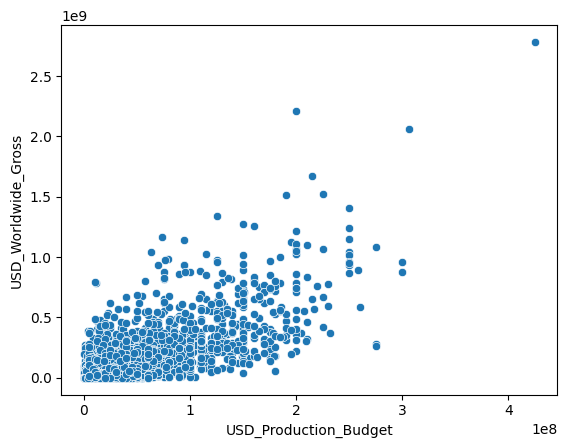

In [39]:
sns.scatterplot(data=data_clean,
                x="USD_Production_Budget",
                y="USD_Worldwide_Gross",)

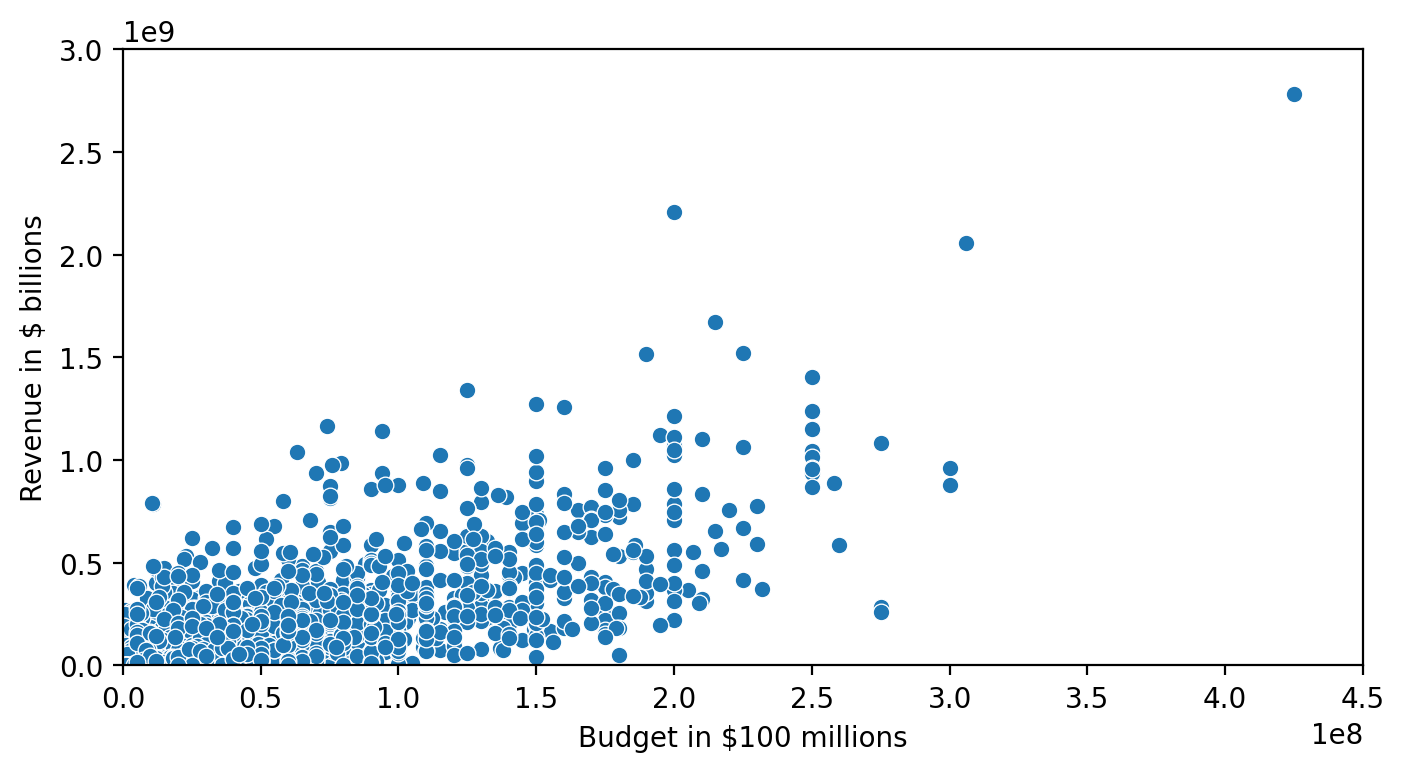

In [43]:
# Part from matplotlib
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                x="USD_Production_Budget",
                y="USD_Worldwide_Gross",
                )

# Style our chart we can simply configure the Axes object that is returned from sns.scatterplot()
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

# Part from matplotlib
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



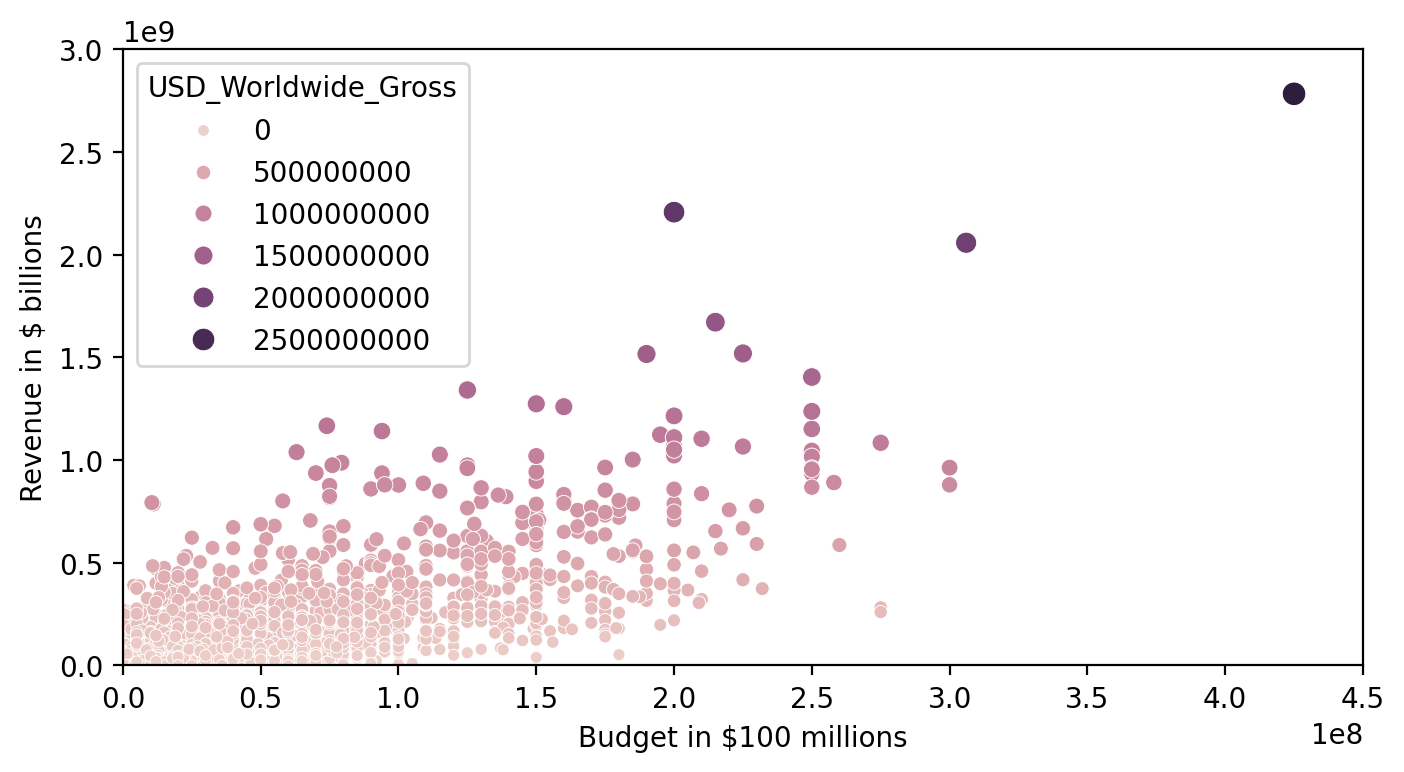

In [44]:
# Reason we're using Seaborn is because of the hue and size parameters that make it very easy to create a bubble chart
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

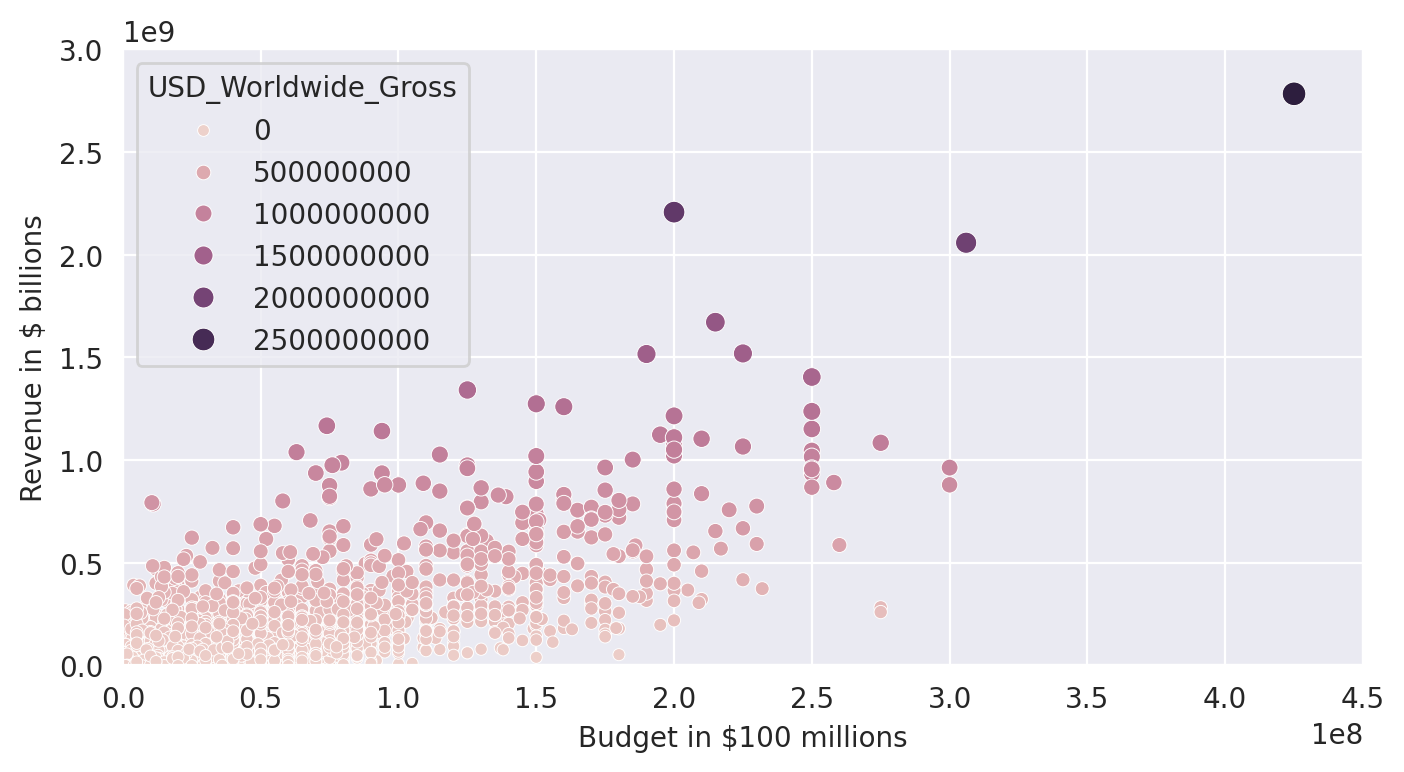

In [49]:
# To set the styling on a single chart (as opposed to all the charts in the entire notebook) we can use Python's with keyword
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

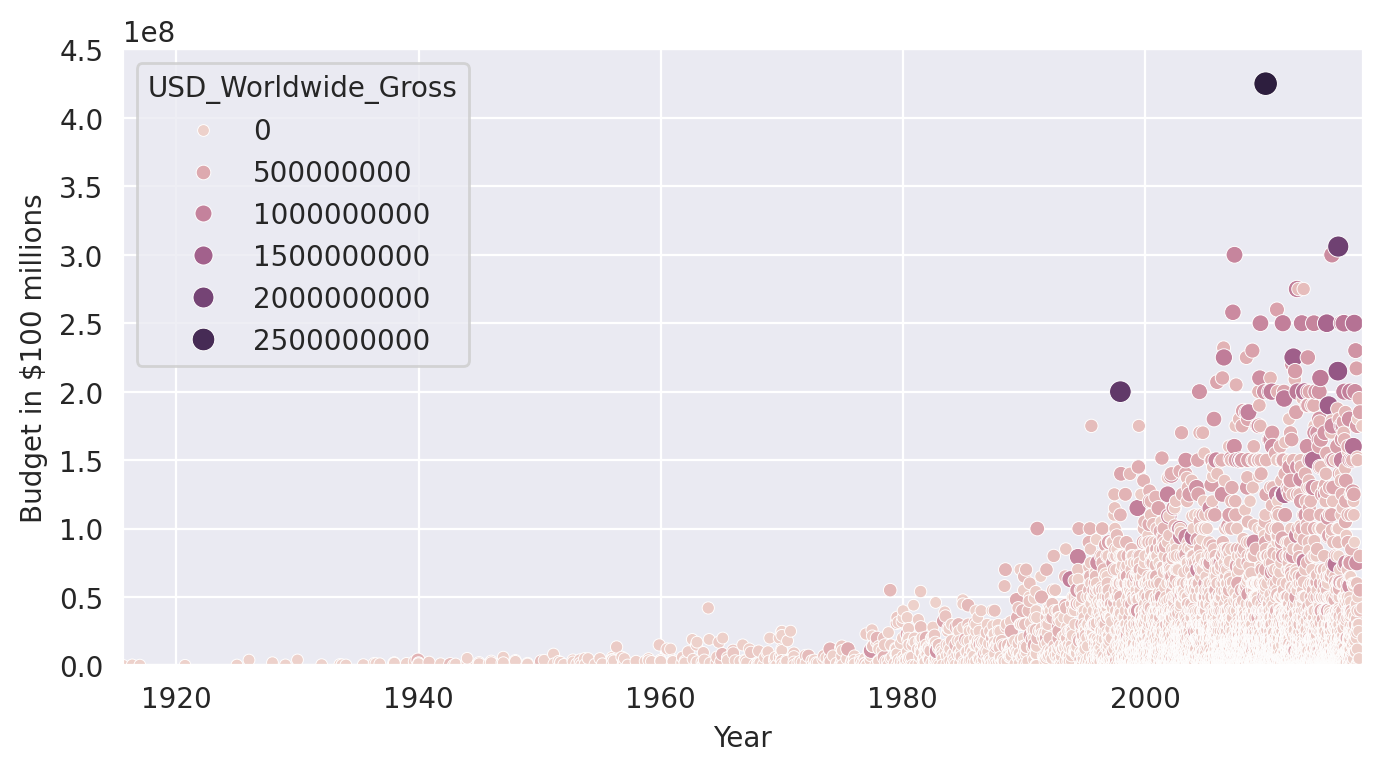

In [50]:
# Movie Budgets over Time

plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [58]:
# Extract all the years from the DatetimeIndex
dt_index = pd.DatetimeIndex(data=data_clean["Release_Date"])
years = dt_index.year 
print(years)

# Convert years to decades
decades = years // 10 * 10 # floor division // gives only whole numbers as result (1955//10=195)
print(decades)

# Add the decades as a column to the data_clean DataFrame
data_clean["Decade"] = decades
data_clean.head()


Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Release_Date', length=5384)
Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
       ...
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='Release_Date', length=5384)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [68]:
# Creating two new DataFrames: `old_films` and `new_films`
old_films = data_clean[data_clean["Decade"] < 1970]
# How many films were released before 1970?
print(f"There are {len(old_films)} films released before 1970.")
# What was the most expensive film made prior to 1970?
max_budget_film_index = old_films["USD_Production_Budget"].idxmax()
print(f"The most expensive film made before 1970 is '{old_films.loc[max_budget_film_index, "Movie_Title"]}' with a budget of {old_films['USD_Production_Budget'].max():,.0f}.")

new_films = data_clean[data_clean["Decade"] >= 1970]


There are 153 films released before 1970.
The most expensive film made before 1970 is 'Cleopatra' with a budget of 42,000,000.


In [66]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


In [67]:
new_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,"5,231.00",5231,"5,231.00","5,231.00","5,231.00","5,231.00"
mean,"2,652.00",2005-02-19 05:27:18.615943424,"31,811,437.73","90,683,497.56","41,841,922.35","2,000.19"
min,1.00,1970-01-01 00:00:00,"1,100.00",0.00,0.00,"1,970.00"
25%,"1,314.50",2000-07-14 00:00:00,"5,000,000.00","3,831,677.00","1,252,581.00","2,000.00"
50%,"2,629.00",2006-10-03 00:00:00,"18,000,000.00","28,544,120.00","17,510,118.00","2,000.00"
75%,"3,967.50",2012-01-06 00:00:00,"40,000,000.00","98,777,000.00","53,301,583.00","2,010.00"
max,"5,391.00",2017-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00","2,010.00"
std,"1,549.33",NaN,"40,758,580.67","170,424,978.36","66,702,734.68",9.58


# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

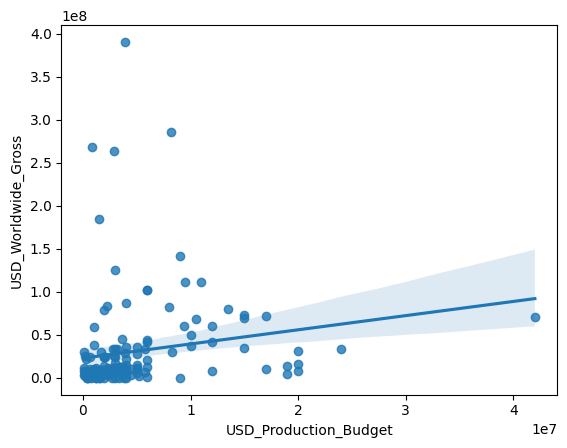

In [69]:
# Visualise the relationship between the movie budget and the worldwide revenue using linear regression
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')


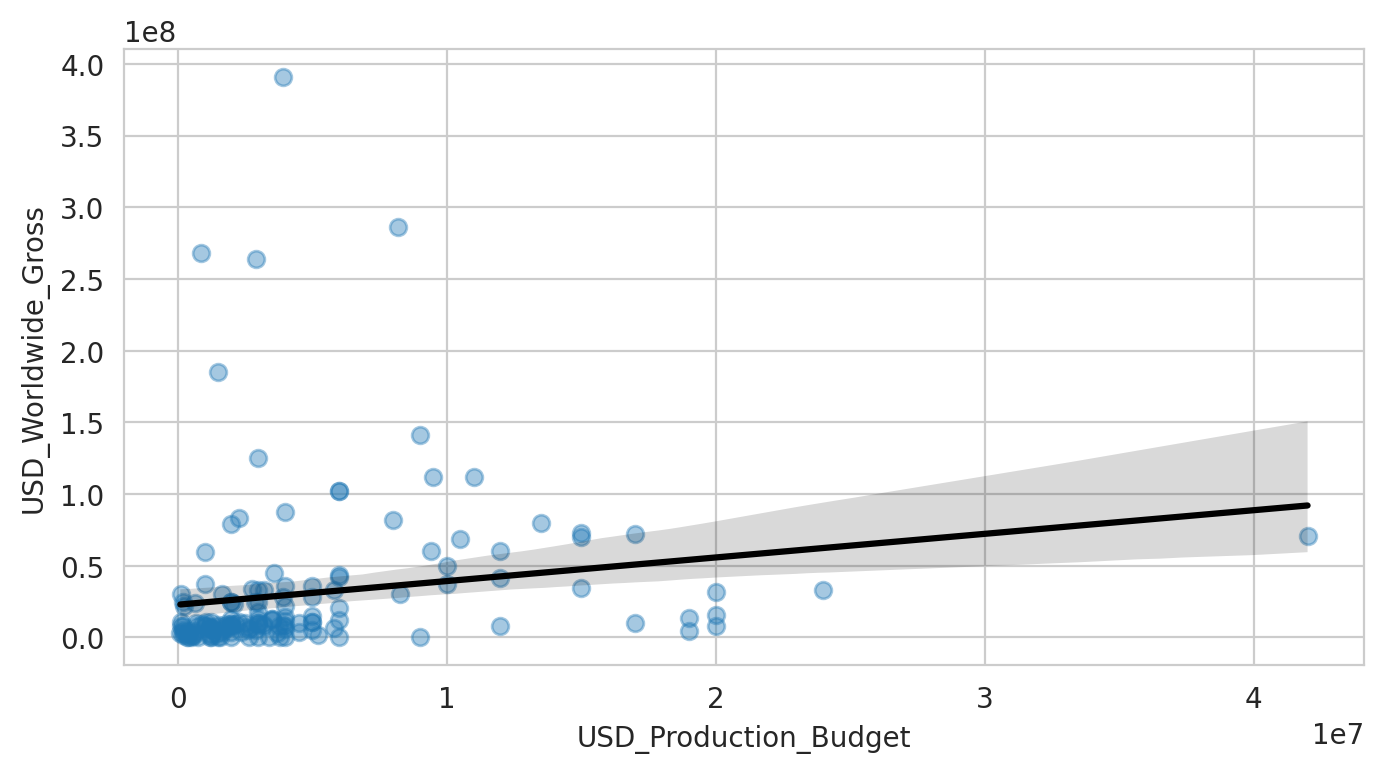

In [76]:
# Using Matplotlib layer and supply keyword arguments as dictionaries
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4}, # transparency of the dots
            line_kws = {'color': 'black'}) # regression line color

What do we see here? Well, first off we can spot Cleopatra on the far right. But also, we see that many lower budget films made much more money! The relationship between the production budget and movie revenue is not very strong. Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all!

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

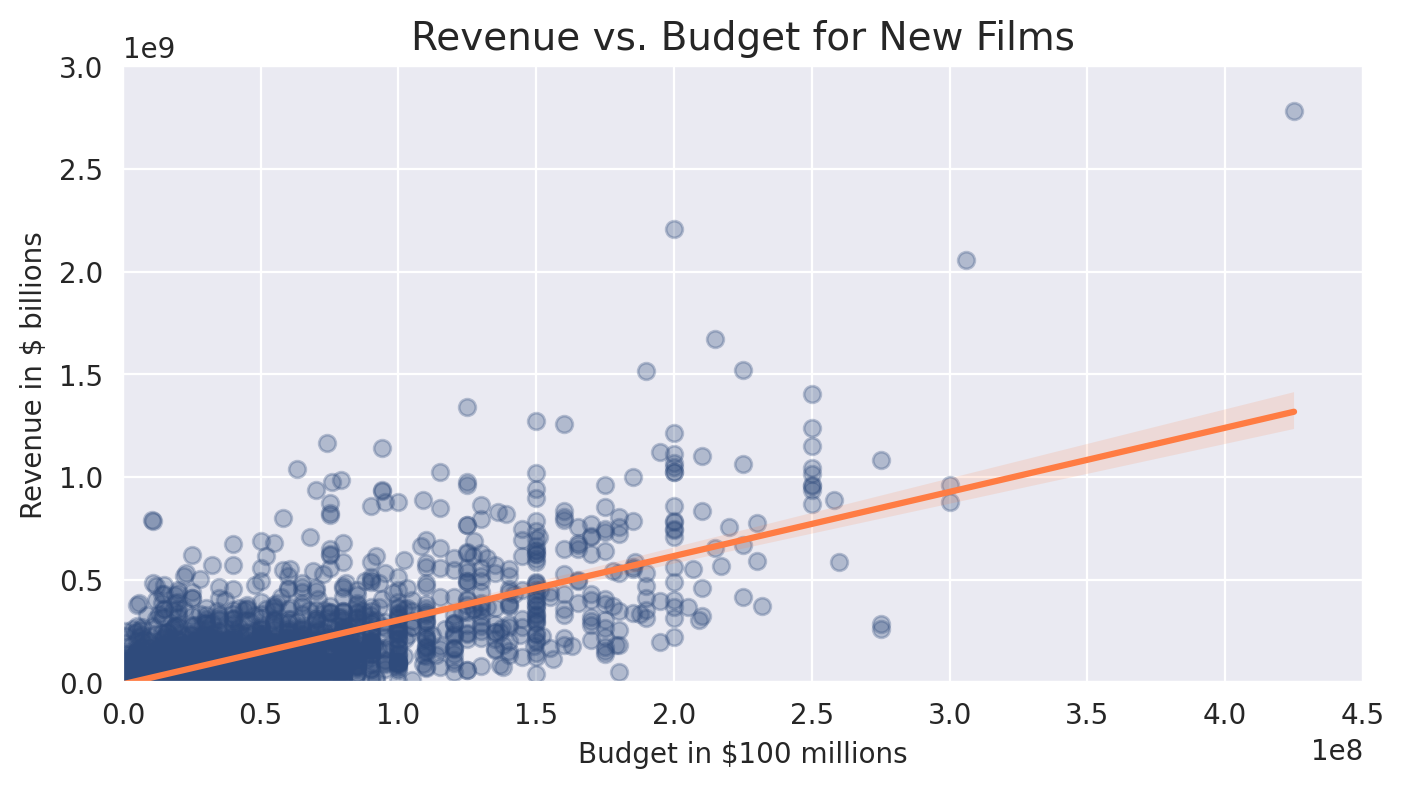

In [81]:
# Create for new films regplot
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            color= '#2f4b7c',
            scatter_kws = {'alpha': 0.3},
            line_kws = {'color': '#ff7c43'})
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions',)
  ax.set_title("Revenue vs. Budget for New Films", fontsize=14)

This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line (pun intended). Also, the confidence interval is much narrower. We also see that a film with a $150 million budget is predicted to make slightly under $500 million by our regression line.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

We are using a univariate regression. This is a regression with a single explanatory variable (our movie BUDGET). Explanatory variables are also referred to as features in machine learning terminology.

To find the best possible line, our regression will estimate the y-intercept ("theta zero") and the slope ("theta one"). The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0. The slope tells us how much extra revenue we get for a $1 increase in the movie budget.

In [87]:
# Create a Linear Regression object that will do the work for our regression
regression = LinearRegression()

# Now we should specify our features and our targets (i.e., our response variable). You will often see the features named capital X and the target named lower case y:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 
#info Our LinearRegression does not like receiving Pandas Series (e.g., new_films.USD_Production_Budget), so I've created some new DataFrames here.

# Find best fit line
regression.fit(X, y)

# Theta zero
print(regression.intercept_)
#note Interpretation: Literally, means that if a movie budget is $0, the estimated movie revenue is -$8.65 ????????

# Theta one
print(regression.coef_)
#note Interpretation: The slope tells us that for every extra $1 in the budget, movie revenue increases by $3.1


[-8650768.00661042]
[[3.12259592]]


### R-Squared: Goodness of Fit

One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.

In [85]:
# R-squared
regression.score(X, y)
#note Interpretation: This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.


0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [94]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])

# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 

# Find best fit line
regression.fit(X,y)

# Theta zero / intercept
print(regression.intercept_)

# Theta one / slope
print(regression.coef_[0,0]) # positive slope suggest positive relationship between budget and revenue

# R-squared
print(regression.score(X, y)) # --> only 3% of variance explained in the linear regression model, which make sense considering how poorly our data points aligned with our line earlier.

[22821538.63508039]
1.6477131440107315
0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [92]:
# Formula solution
22821538.63508039 + 1.64771314 * 350000000
# almost 600 mil

599521137.6350803

In [113]:
# Regression solution
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:,.2f} USD.')
revenue_estimate

The estimated revenue for a $350 film is around $600,000,000.00 USD.


600000000.0

Use nested loops to remove unwanted characters from multiple columns

Filter Pandas DataFrames based on multiple conditions using both .loc[] and .query()

Create bubble charts using the Seaborn Library

Style Seaborn charts using the pre-built styles and by modifying Matplotlib parameters

Use floor division (i.e., integer division) to convert years to decades

Use Seaborn to superimpose a linear regressions over our data

Make a judgement if our regression is good or bad based on how well the model fits our data and the r-squared metric

Run regressions with scikit-learn and calculate the coefficients.

